In [1]:
!pip install --user matplotlib pandas numpy scipy sklearn

    100% |████████████████████████████████| 15.0MB 55kB/s eta 0:00:01   37% |████████████                    | 5.7MB 1.0MB/s eta 0:00:10    38% |████████████▍                   | 5.8MB 843kB/s eta 0:00:11    92% |█████████████████████████████▋  | 13.9MB 583kB/s eta 0:00:02
    100% |████████████████████████████████| 49.6MB 15kB/s eta 0:00:01    45% |██████████████▌                 | 22.4MB 882kB/s eta 0:00:31    50% |████████████████                | 24.9MB 836kB/s eta 0:00:30    50% |████████████████                | 25.0MB 955kB/s eta 0:00:26    67% |█████████████████████▋          | 33.6MB 587kB/s eta 0:00:28
    100% |████████████████████████████████| 12.2MB 67kB/s eta 0:00:01
  Running setup.py bdist_wheel for sklearn ... done
  Stored in directory: /home/b10317005/.cache/pip/wheels/d7/db/a3/1b8041ab0be63b5c96c503df8e757cf205c2848cf9ef55f85e
Successfully built sklearn


In [3]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import requests
from io import BytesIO

iris_url='https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'
resp=requests.get(iris_url)
print(resp.content)

data=BytesIO(resp.content)

b'sepal_length,sepal_width,petal_length,petal_width,species\n5.1,3.5,1.4,0.2,setosa\n4.9,3,1.4,0.2,setosa\n4.7,3.2,1.3,0.2,setosa\n4.6,3.1,1.5,0.2,setosa\n5,3.6,1.4,0.2,setosa\n5.4,3.9,1.7,0.4,setosa\n4.6,3.4,1.4,0.3,setosa\n5,3.4,1.5,0.2,setosa\n4.4,2.9,1.4,0.2,setosa\n4.9,3.1,1.5,0.1,setosa\n5.4,3.7,1.5,0.2,setosa\n4.8,3.4,1.6,0.2,setosa\n4.8,3,1.4,0.1,setosa\n4.3,3,1.1,0.1,setosa\n5.8,4,1.2,0.2,setosa\n5.7,4.4,1.5,0.4,setosa\n5.4,3.9,1.3,0.4,setosa\n5.1,3.5,1.4,0.3,setosa\n5.7,3.8,1.7,0.3,setosa\n5.1,3.8,1.5,0.3,setosa\n5.4,3.4,1.7,0.2,setosa\n5.1,3.7,1.5,0.4,setosa\n4.6,3.6,1,0.2,setosa\n5.1,3.3,1.7,0.5,setosa\n4.8,3.4,1.9,0.2,setosa\n5,3,1.6,0.2,setosa\n5,3.4,1.6,0.4,setosa\n5.2,3.5,1.5,0.2,setosa\n5.2,3.4,1.4,0.2,setosa\n4.7,3.2,1.6,0.2,setosa\n4.8,3.1,1.6,0.2,setosa\n5.4,3.4,1.5,0.4,setosa\n5.2,4.1,1.5,0.1,setosa\n5.5,4.2,1.4,0.2,setosa\n4.9,3.1,1.5,0.1,setosa\n5,3.2,1.2,0.2,setosa\n5.5,3.5,1.3,0.2,setosa\n4.9,3.1,1.5,0.1,setosa\n4.4,3,1.3,0.2,setosa\n5.1,3.4,1.5,0.2,setosa\n5,3

In [6]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score)

df = pd.read_csv(data)
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [7]:
print(df.head()['sepal_length'])

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64


In [8]:
print(df.iloc[0])

sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object


In [12]:
target =df[df.columns[-1]]
target =target.astype('category')
numeric_data=df._get_numeric_data()
print(target.head())
print(numeric_data.head())

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


In [21]:
training_data, testing_data , training_label, testing_label=train_test_split(numeric_data, target.cat.codes)

print('training_data')
print(training_data.head())

print(len(training_data))
print(len(testing_data))

training_data
     sepal_length  sepal_width  petal_length  petal_width
113           5.7          2.5           5.0          2.0
75            6.6          3.0           4.4          1.4
104           6.5          3.0           5.8          2.2
138           6.0          3.0           4.8          1.8
55            5.7          2.8           4.5          1.3
112
38


In [22]:
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(training_data,training_label)

print(tree_model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [23]:
predict_result = tree_model.predict(testing_data)
score_result = tree_model.predict_proba(testing_data)

print(predict_result[0:5])
print(score_result[0:5])

[1 0 2 2 2]
[[ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]]


In [25]:
matrix=confusion_matrix(testing_label,predict_result)
report=classification_report(testing_label,predict_result,target_names=target.cat.categories)
acc=accuracy_score(testing_label,predict_result)

print(matrix)
print("---------")
print(report)
print("---------")
print(acc)

[[ 9  0  0]
 [ 0 15  3]
 [ 0  0 11]]
---------
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         9
 versicolor       1.00      0.83      0.91        18
  virginica       0.79      1.00      0.88        11

avg / total       0.94      0.92      0.92        38

---------
0.921052631579


Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.    0.62  0.38]
 [ 0.    0.    1.  ]]


NameError: name 'figsize' is not defined

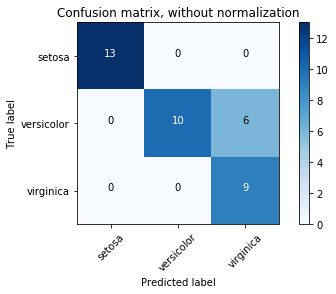

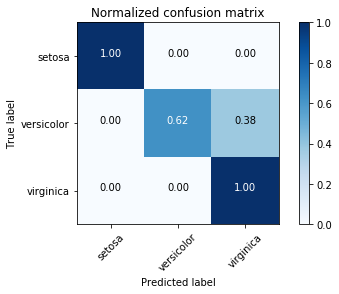

In [32]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[ 9  0  0]
 [ 0 15  3]
 [ 0  0 11]]


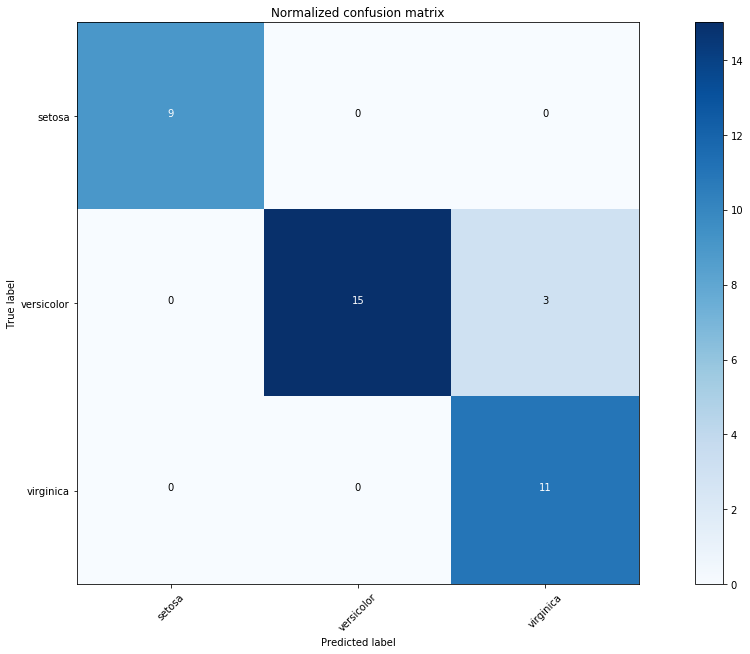

In [35]:
plt.figure(figsize=(16,9))
plot_confusion_matrix(matrix,classes=target.cat.categories,title='Normalized confusion matrix')
plt.show()